Figure S2 from Mahdavi & Siegel (2021) Indoor Air (IA)

This figure illustrates the PSD of after-sieve and sieved fracttions from 13 filters where both fractions were available. The range of 25th to 75th percentiles is illustrated. The figure is presented in the Supplemental Information (SI).

Plot type: Line plot

In [1]:
from matplotlib import pyplot as plt
from matplotlib import container
import pandas as pd
import numpy as np

In [2]:
#########################################################################################
### Step 1: Keeping SNs with both D and S (referred to as after-sieve and sieve dust) ###
#########################################################################################

df = pd.read_excel(r'natl_d_master.xlsx')
sn_list = list(set(list((df[df['Sample Name'].str[9:10] == 'S']['Sample Name'].str[5:8]))))
sn_list.sort()

df = pd.read_excel(r'natl_psd_master.xlsx')
size  = df['Size']
col_list_d = [col for col in df.columns if (col[5:8] in sn_list) & (col[-4:] == 'mean') & (col[9:10] == 'D')]
col_list_s = [col for col in df.columns if (col[5:8] in sn_list) & (col[-4:] == 'mean') & (col[9:10] == 'S')]

df_d = df[col_list_d].apply(pd.DataFrame.describe, axis=1)
df_s = df[col_list_s].apply(pd.DataFrame.describe, axis=1)


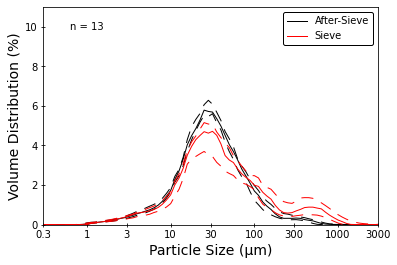

In [3]:
###############################
### Step 2: Plotting Figure ###
###############################

plt.figure()
plt.plot(size, df_d['50%'], c = 'k', lw = 1, label = 'After-Sieve')
plt.plot(size, df_d['25%'], c = 'k', lw = 1, ls = (0,(12,8.5)))
plt.plot(size, df_d['75%'], c = 'k', lw = 1, ls = (0,(12,8.5)))

plt.plot(size, df_s['50%'], c = 'r', lw = 1, label = 'Sieve')
plt.plot(size, df_s['25%'], c = 'r', lw = 1, ls = (0,(12,8.5)))
plt.plot(size, df_s['75%'], c = 'r', lw = 1, ls = (0,(12,8.5)))

plt.xscale('log')

plt.xlim(0.3, 3000)
a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 11)
plt.yticks(np.arange(0, 12, step=2))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(1,10,'n = 13', ha = 'center', va = 'center')
plt.savefig(r'FigureS2.jpg', format='jpg', dpi=1600, bbox_inches='tight')
